## Demo 5 - Moduli space of unirateral equilateral pentagons 

### A toy model for energy landscapes and molecular dynamics

In [2]:
# Import libraries

import random

import numpy as np

from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

from ripser import ripser
from persim import plot_diagrams

from dreimac import CircularCoords

import plotly.graph_objects as go

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\dreimac-0.2.0-py3.11.egg\dreimac\combinatorial.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\dreimac-0.2.0-py3.11.egg\dreimac\combinatorial.py:31: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
C:\Users\user\AppData\Lo

# Moduli Space of Equilateral Pentagons

The space of planar pentagons of side length 1 is the set


$$\mathbb{M} = \left\{ (\mathbf{p}_0, \ldots, \mathbf{p}_5) \in \mathbb{C}^5 \; : \; |\mathbf{p}_{i} - \mathbf{p}_{i+1}| = 1 \right\} \big/ \sim $$

where two pentagons are regarded as equivalent, $\mathbf{p} \sim  \mathbf{p}' $, if and only if $ \mathbf{p}' = U\mathbf{p} + \mathbf{v} $ for   $ U \in U(1) $ and $ \mathbf{v} \in \mathbb{C} $. 

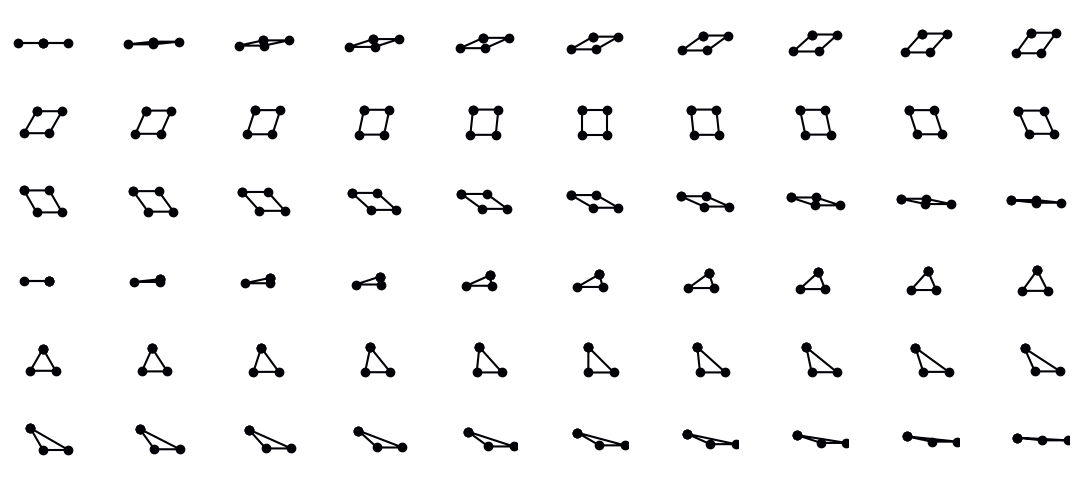

In [29]:
# Adapted from jopera's equilateral pentagram moduli space

y = 30
data_aug = np.zeros((2 * y, 8))
data_aug[:,2] = 1
for i in range(y):
    data_aug[i,4] = np.cos((np.pi * i) / y) + 1
    data_aug[i,5] = np.sin((np.pi * i) / y)
    data_aug[i,6] = np.cos((np.pi * i) / y)
    data_aug[i,7] = np.sin((np.pi * i) / y)
for i in range(y):
    j = i + 30
    data_aug[j,4] = np.cos((np.pi * i) / y) 
    data_aug[j,5] = np.sin((np.pi * i) / y) 
    data_aug[j,6] = np.cos((np.pi * i) / y) 
    data_aug[j,7] = np.sin((np.pi * i) / y) 
    
 #data_aug[:,[4,5,6,7]] = data
 #angle_data = np.zeros((data.shape[0],5)) # internal angles
 
 
# for i in range(5):
#     ii = (2*i -2)%10
#     jj = (2*i - 1)%10
#     u = data_aug[:, [ii, jj]]
    
#     ii = (2*i)%10
#     jj = (2*i + 1)%10
#     v = data_aug[:, [ii , jj]]
    
#     ii = (2*i + 2)%10
#     jj = (2*i + 3)%10
#     w = data_aug[:, [ii, jj]]
    
#     z = np.sum((u - v)*(w-v), axis = 1)
    
#     angle_data[:,i]  = np.arccos( np.minimum(z,1) )
    
# energy = np.sum((angle_data - (3/5)*np.pi)**2 , axis = 1)

# plot sample pentagons
plt.figure(figsize=(14,6))
for i in range(60):
    ind = i #random.randint(0, data.shape[0])
    x = data_aug[ind].reshape(4,2).T
    cent = np.mean(x,axis=1)
    plt.subplot(6,10,i+1)
    plt.plot(x[0,range(-1,4)], x[1,range(-1,4)] , '-o', c= cm.magma(1))
    plt.axis('square')
    plt.axis('off')
    plt.xlim(cent[0]-1.3,cent[0]+1.3);
    plt.ylim(cent[1]-1.3,cent[1]+1.3);

In [31]:
#PCA
pca = PCA(n_components=4)
data_pca = pca.fit(data_aug).transform(data_aug)

print('Explained Vairance', pca.explained_variance_ratio_)

fig = go.Figure(data=[go.Scatter3d(
    x=data_pca[:,0], y=data_pca[:,1], z=data_pca[:,2], 
    mode ='markers', 
    marker=dict(size = 3, color =1, colorscale='plasma')
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show()

Explained Vairance [7.92433157e-01 1.31635659e-01 7.59311838e-02 7.33477083e-33]


In [ ]:
# ISOMAP | Warning : May be slooooooowwwww!!!! 
# random subsample of the data
ind_rand_data = np.random.randint(0, high=data.shape[0], size= 10000)
rand_data = data[ind_rand_data , :]

iso = Isomap(n_components = 3 , n_neighbors = 7)
rand_data_iso = iso.fit_transform(rand_data)

fig = go.Figure(data=[go.Scatter3d(
    x=rand_data_iso[:,0], y=rand_data_iso[:,1], z=rand_data_iso[:,2], 
    mode ='markers', 
    marker=dict(size = 3, color =energy[ind_rand_data], colorscale='plasma')
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show()

In [ ]:
# LLE | Warning : can be slow (not as much as ISOMAP)
# random subsample
ind_rand_data = np.random.randint(0, high=data.shape[0], size= 20000)
rand_data = data[ind_rand_data , :]

rand_data_lle = LLE(n_components = 3 , n_neighbors = 20).fit_transform(rand_data)

fig = go.Figure(data=[go.Scatter3d(
    x=rand_data_lle[:,0], y=rand_data_lle[:,1], z=rand_data_lle[:,2], 
    mode ='markers', 
    marker=dict(size = 3, color =energy[ind_rand_data], colorscale='plasma')
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show()


In [ ]:
# Persistence Computation
n_land = 500
res = ripser(data, maxdim=2, n_perm = n_land, coeff =2, thresh = 1.8)
dgms = res['dgms']
plt.figure(figsize = (4,4)) 
plot_diagrams(dgms)

In [ ]:
pers1 = dgms[1][:,1] - dgms[1][:,0]
pers1_sorted = np.sort(pers1)[::-1]
print('Persistence of the top 12 1-d features:\n' ,pers1_sorted[0:12])

In [ ]:
pers2 = dgms[2][:,1] - dgms[2][:,0]
pers2_sorted = np.sort(pers2[pers2 < np.Inf])[::-1]
print('Persistence of the top 12 2-d features:\n' ,pers2_sorted[0:12])

In [ ]:
# Circular Coordinates
cc = CircularCoords(data , distance_matrix = False, n_landmarks= 1000, prime = 13)

In [ ]:
# Complete the code in this cell: Find appropriate circular coordinates to plot the data

alpha = 0.6
theta1 = cc.get_coordinates(perc= alpha, cocycle_idx=  )      # Complete this!!
theta2 = cc.get_coordinates(perc= alpha, cocycle_idx=  )      # Complete this!!
theta3 = cc.get_coordinates(perc= alpha, cocycle_idx=  )      # Complete this!!

# You may want to translate or re-scale (modulo 2\pi) the computeded circular coordinates
# theta1 = 
# theta2 = 
# theta3 = 

In [ ]:
# Plot the data using the computed circular coordintaes, and colors given by pentagon energy

fig = go.Figure(data=[go.Scatter3d(
    x=theta1, y=theta2, z=theta3, 
    mode ='markers', 
    marker=dict(size = 3, color =energy, colorscale='plasma')
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show()

---

If everything went well, your image result should look something like:

<img src="https://i.ibb.co/0cyj5KM/newplot.png" alt="test-1" border="0" width=300px>


----